### 画图和可视化

在notebook中引入mataplotlib，首先需要执行下列语句：

In [1]:
%matplotlib notebook

先画个简单的图，练练手

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
arr = np.arange(10)

In [4]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


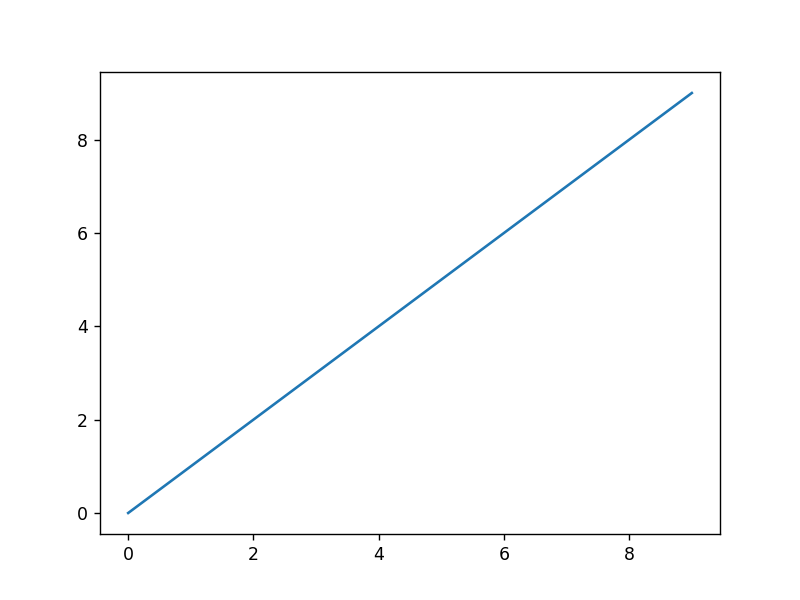

In [6]:
plt.plot(arr)

#### 使用matplotlib画图

一般来说，画图的步骤是

fig = plt.figure()创建Figure对象，

然后使用axe1 = fig.add_subplot(2,2,1)创建网格。

由于创建subplot网格是很常见的任务，所以matplotlib有一个方便的方法，如下

<IPython.core.display.Javascript object>


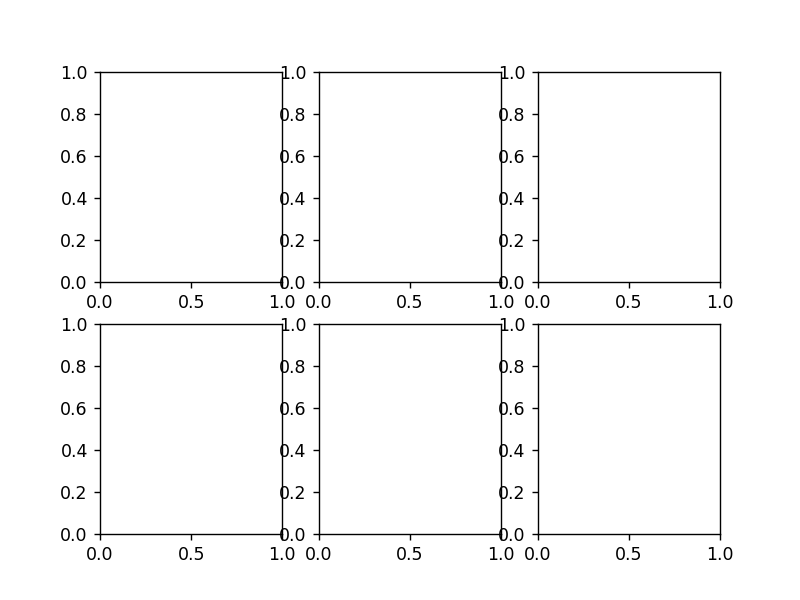

In [46]:
fig, axes = plt.subplots(2,3)

In [40]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001ED91CC0>,
      dtype=object)

In [ ]:
我们可以像使用二维数组一样，使用axes

In [41]:
axes[1,1]

我们可以使用subplots_adjust对网格进行操作

<IPython.core.display.Javascript object>


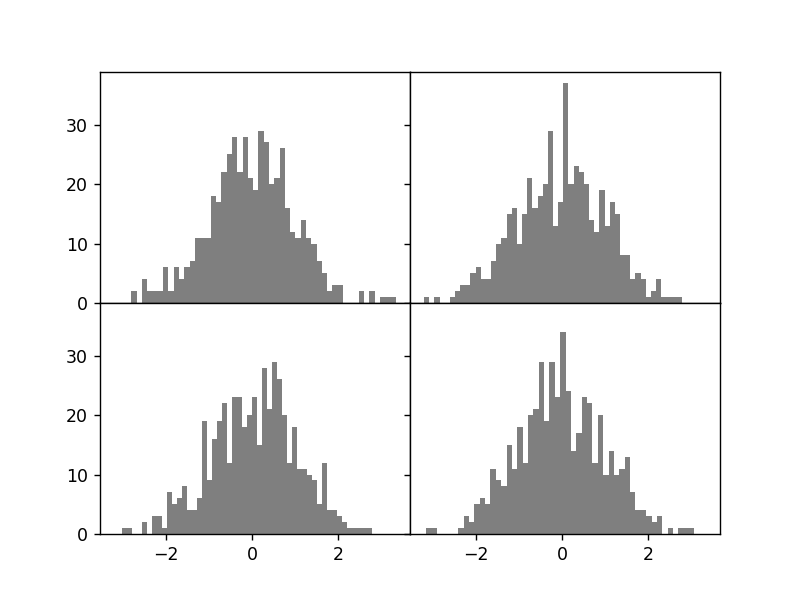

In [50]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

使用plot接受一组X和Y坐标，还可以接受颜色和线型的字符串缩写，具体参考[官方文档](https://matplotlib.org/api/pyplot_summary.html)

<IPython.core.display.Javascript object>


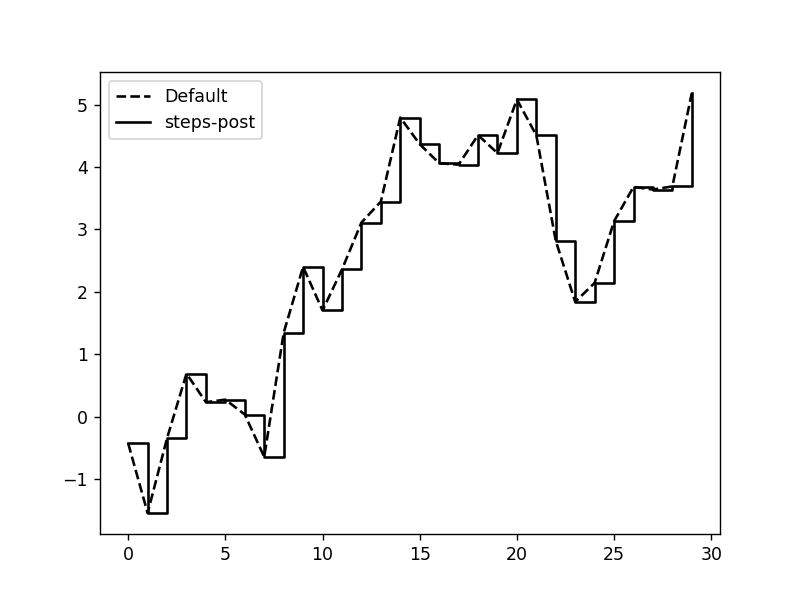

In [57]:
fig = plt.figure()
data = np.random.randn(30).cumsum()

In [58]:
plt.plot(data, 'k--', label='Default')

In [59]:
plt.plot(data, 'k-', label='steps-post', drawstyle='steps-post')

In [60]:
plt.legend(loc='best')

> 注：你必须调用plt.legend（或使用ax.legend，如果引用了轴的话）来创建图例，无论你绘图时是否传递label标签选项。

axe下有一系列的函数，可以用来设置标题、轴标签、刻度、刻度标签、注解等，详情参见[官方文档](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html#matplotlib.pyplot.axes)

<IPython.core.display.Javascript object>


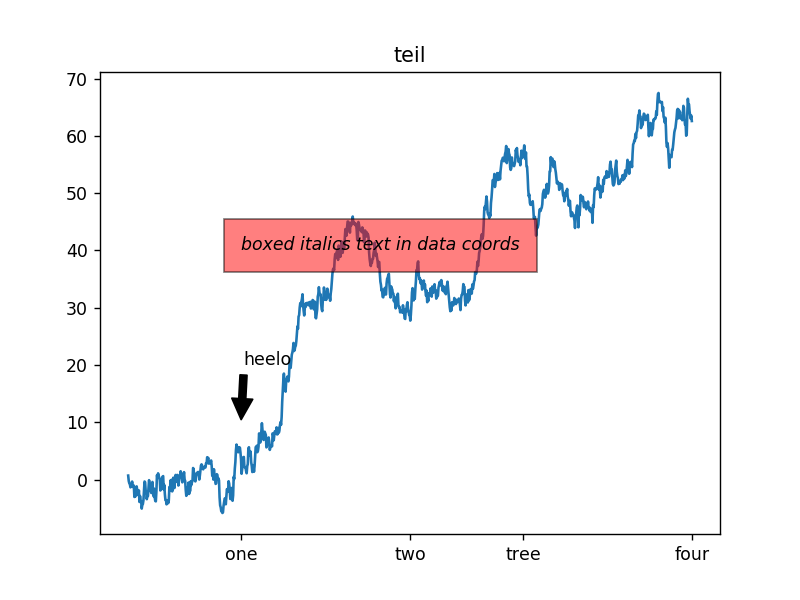

In [89]:
figu = plt.figure()
axe = figu.add_subplot(1,1,1)

In [90]:
axe.plot(np.random.randn(1000).cumsum())

In [91]:
axe.set_title('teil')

Text(0.5, 1.0, 'teil')

In [92]:
axe.set_xticks([200,500,700,1000])

In [93]:
axe.set_xticklabels(['one','two', 'tree','four'])

[Text(200, 0, 'one'),
 Text(500, 0, 'two'),
 Text(700, 0, 'tree'),
 Text(1000, 0, 'four')]

plt.savefig用于将图片保存起来

In [95]:
plt.savefig('figpath.svg')

给图片加入注解

In [94]:
axe.annotate('heelo',xy=(200,10),xytext=(205,20), arrowprops=dict(facecolor='black', shrink=0.05))

Text(205, 20, 'heelo')

In [96]:
axe.text(200, 40, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

Text(200, 40, 'boxed italics text in data coords')

matplotlib配置

plt.rc()可以针对对象进行全局配置，[详见官网](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.rc.html?highlight=rc#matplotlib.pyplot.rc)

#### 使用pandas和seaborn绘图

在pandas中，我们有多列数据，还有行和列标签。pandas自身就有内置的方法，用于简化从DataFrame和Series绘制图形。

##### 画线型图

In [106]:
import pandas as pd
%matplotlib notebook

In [107]:
s = pd.Series(np.random.randn(10).cumsum(),index = np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


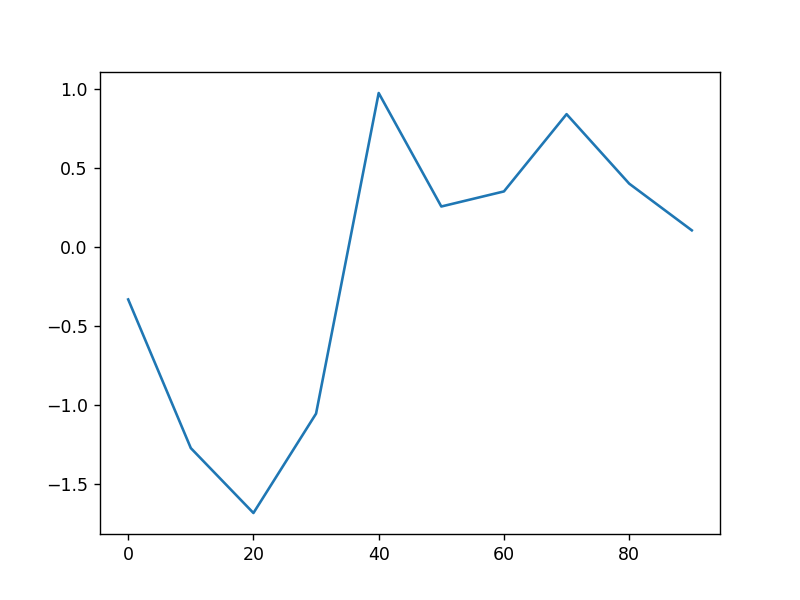

In [108]:
s.plot()

该Series对象是以索引为X轴，可以通过plot方法中的参数控制该功能，同时，plot方法中还有许多参数，详情参见[官网](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

pandas的大部分绘图方法都有一个可选的ax参数，它可以是一个matplotlib的subplot对象。这使你能够在网格布局中更为灵活地处理subplot的位置。

<IPython.core.display.Javascript object>


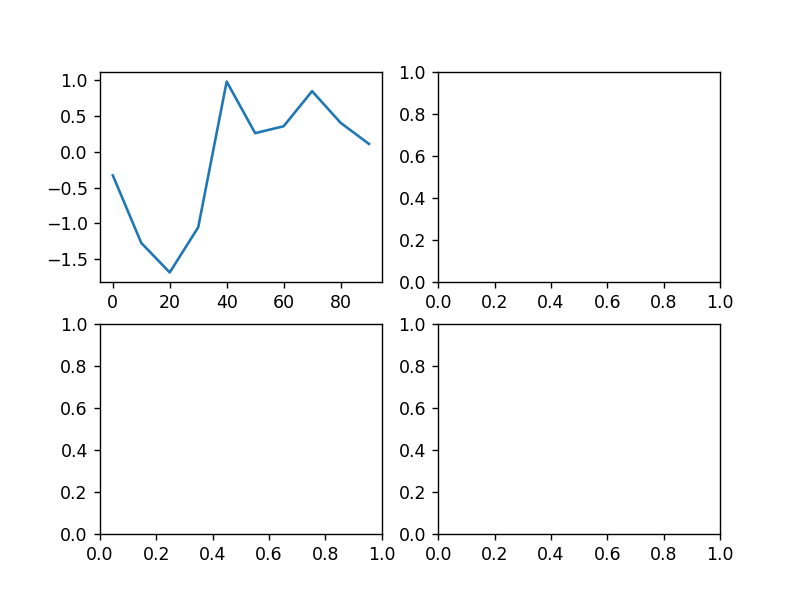

In [110]:
figur, axes = plt.subplots(2,2)

In [113]:
s.plot(ax=axes[0,0])

DataFrame画线型图，plot的方法会在一个subplot中为各列绘制一条线，并自动创建图例

In [114]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 index=np.arange(0,100,10),
                 columns=list('ABCD'))

In [115]:
df

,A,B,C,D
0,-0.799025,-2.169834,-0.394241,0.381745
10,-1.179074,-1.393058,-1.339774,1.022025
20,-0.753780,-0.283354,-0.383332,1.634779
30,-1.525925,-2.648432,-1.707090,2.395719
40,-0.216716,-2.519372,-1.789237,4.262629
50,0.920643,-1.627143,-0.633517,3.941622
60,0.189983,-1.465713,-1.588201,2.110096
70,0.196565,-0.354749,-1.723177,2.728043
80,1.054171,-0.502462,-1.275064,1.834319
90,0.834614,-1.447303,-1.554122,1.176367


<IPython.core.display.Javascript object>


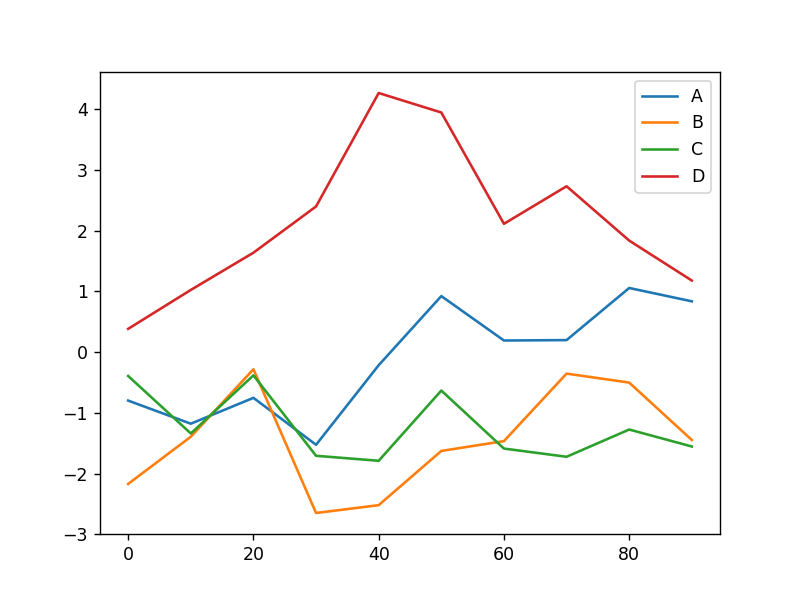

In [116]:
df.plot()

DataFrame还有一些用于对列进行灵活处理的选项，例如，是要将所有列都绘制到一个subplot中还是创建各自的subplot。该参数官网文档中没有，只能通过代码提示找到相关用法

<IPython.core.display.Javascript object>


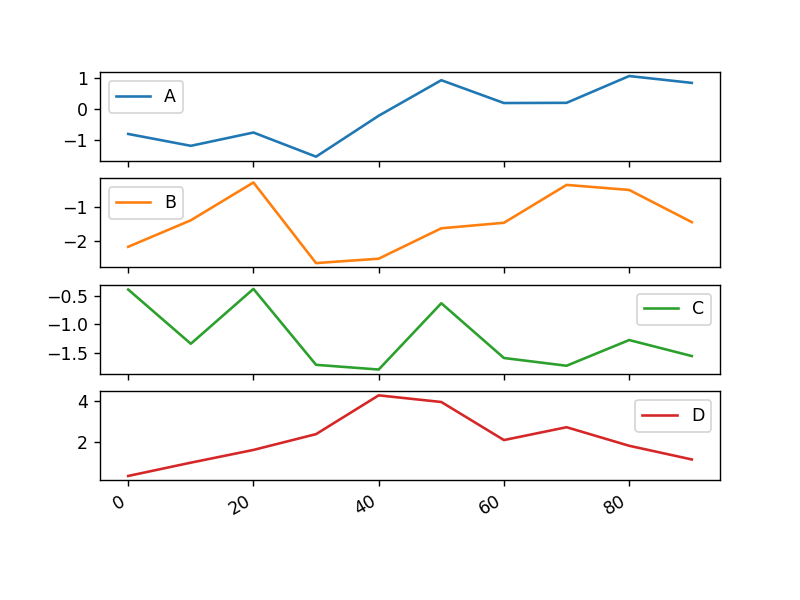

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000002B3290F0>,
      dtype=object)

In [118]:
df.plot(subplots=True)

##### 画柱状图

plot.bar()和plot.barh()分别绘制水平和垂直的柱状图，这时，Series和DataFrame的索引将会被用作X(bar)和Y(barh)刻度，如下

In [121]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

<IPython.core.display.Javascript object>


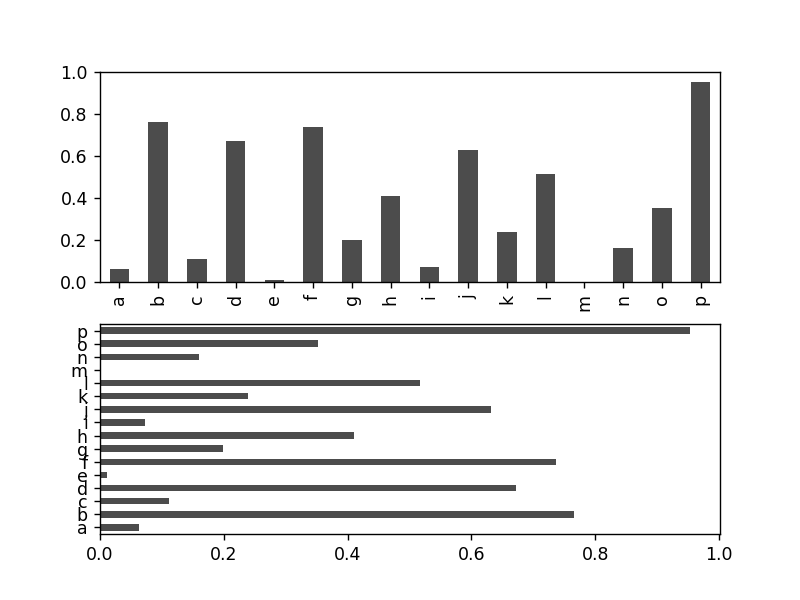

In [122]:
fig, axes = plt.subplots(2, 1)

In [123]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [124]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

对于DataFrame来说

In [145]:
df1 = pd.DataFrame(np.random.rand(6,4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=list('ABCD'))

In [146]:
df1

,A,B,C,D
one,0.901386,0.748890,0.536549,0.552230
two,0.141891,0.835714,0.226028,0.690195
three,0.149464,0.432670,0.212300,0.348378
four,0.108711,0.907781,0.853998,0.980416
five,0.807983,0.204683,0.313632,0.181156
six,0.246364,0.420636,0.148560,0.764300


<IPython.core.display.Javascript object>


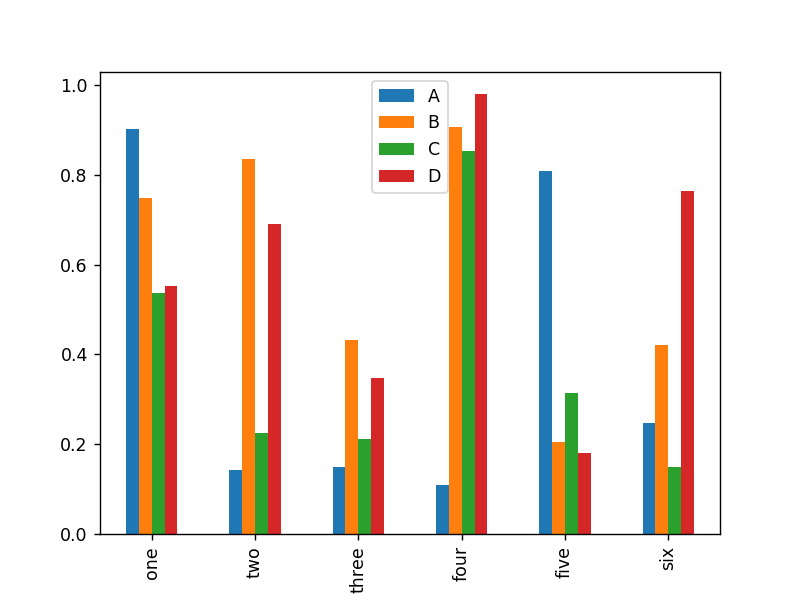

In [147]:
df1.plot.bar()

<IPython.core.display.Javascript object>


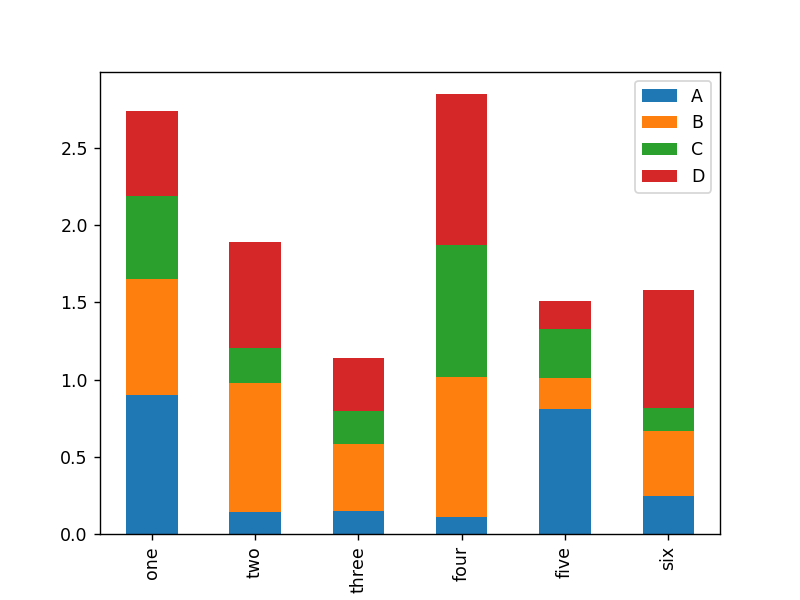

In [148]:
df1.plot.bar(stacked = True)

设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起

In [133]:
tip = pd.read_csv('input/tips.csv')

In [135]:
tip.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [136]:
party_counts = pd.crosstab(tip['day'], tip['size'])

In [138]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


<IPython.core.display.Javascript object>


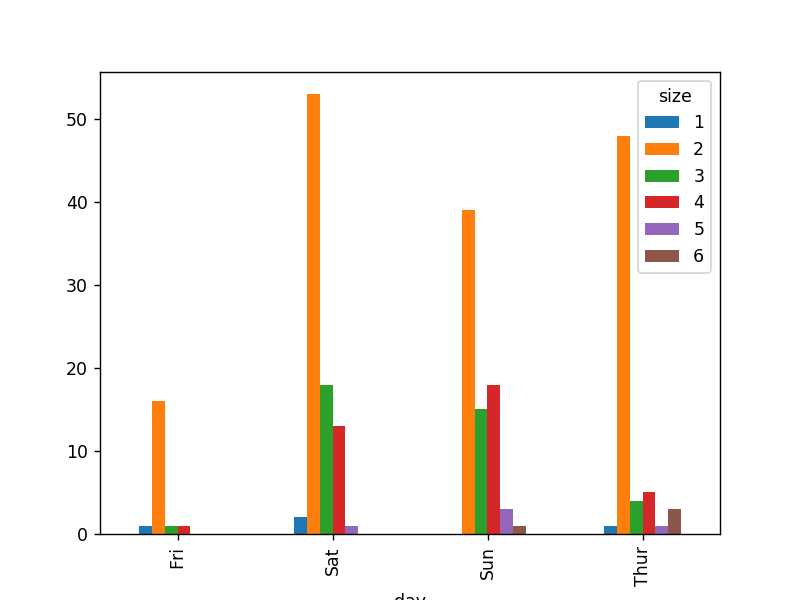

In [162]:
party_counts.plot.bar()

使用seaborn库画统计图,不需要进行交叉表，只需要在方法中指出列名，大大减少工作量！

<IPython.core.display.Javascript object>


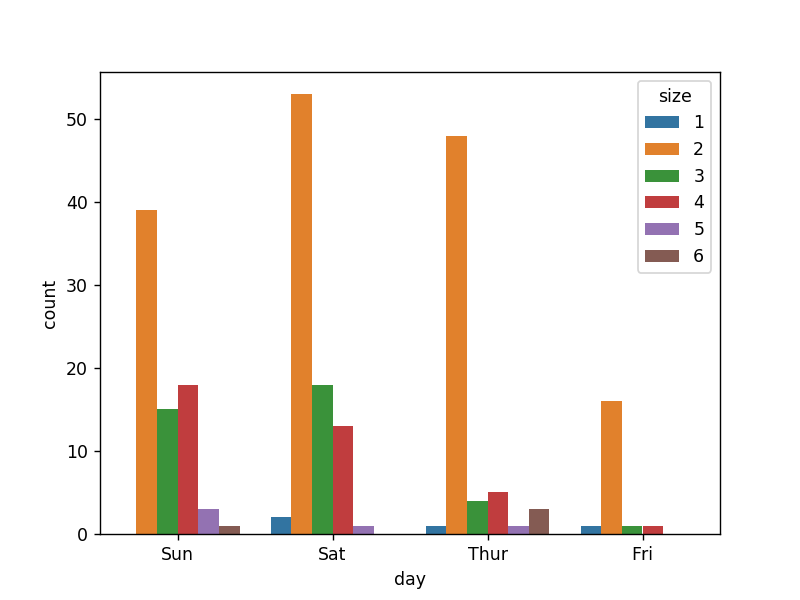

In [158]:
import seaborn as sns
fig = plt.figure()
sns.countplot(x='day',data=tip, hue='size')

##### 画直方图和密度图

直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。

<IPython.core.display.Javascript object>


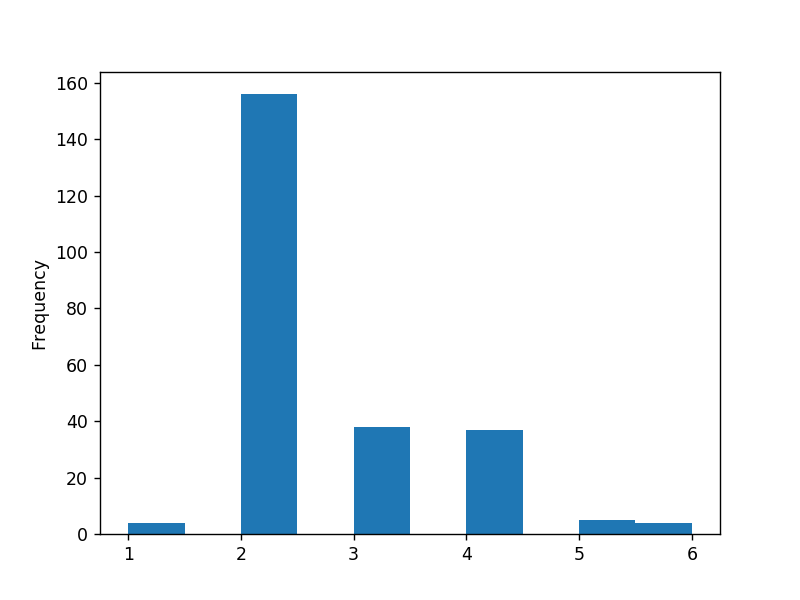

In [163]:
tip['size'].plot.hist()

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。使用plot.kde和标准混合正态分布估计即可生成一张密度图

<IPython.core.display.Javascript object>


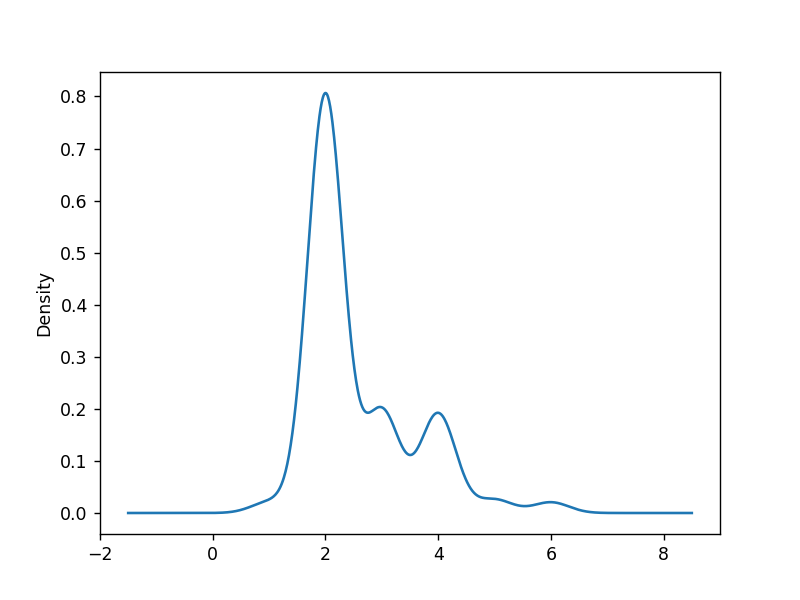

In [164]:
tip['size'].plot.density()

seborn可以同时画出直方图和密度图

<IPython.core.display.Javascript object>


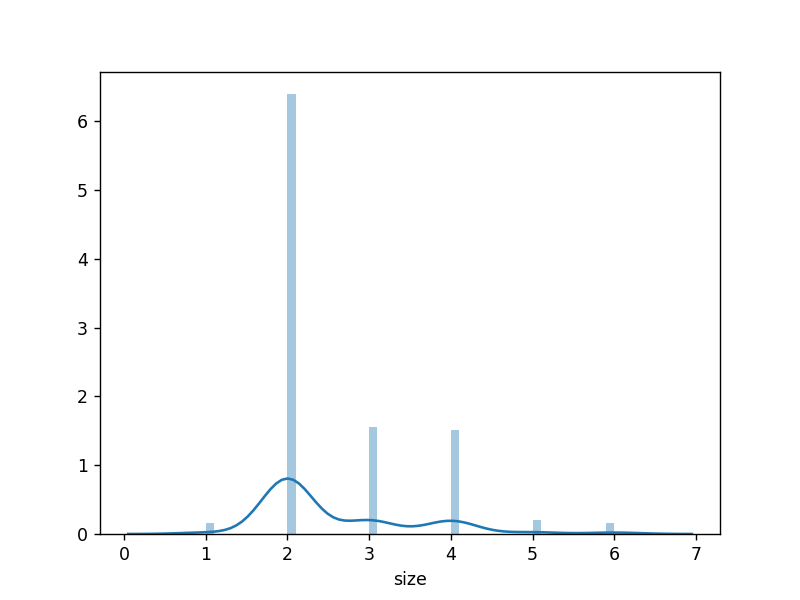

In [165]:
sns.distplot(tip['size'],bins=50)

##### 画散布图和点图

In [167]:
tip.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


<IPython.core.display.Javascript object>


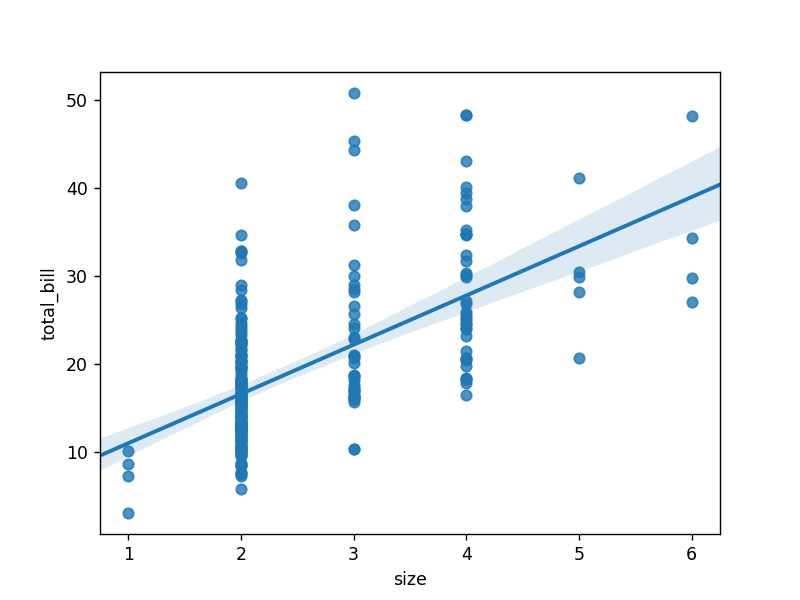

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [168]:
sns.regplot(x='size', y='total_bill', data=tip)

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。纯手工创建这样的图表很费工夫，所以seaborn提供了一个便捷的pairplot函数，它支持在对角线上放置每个变量的直方图或密度估计,具体参数看[官网](http://seaborn.pydata.org/generated/seaborn.pairplot.html)

<IPython.core.display.Javascript object>


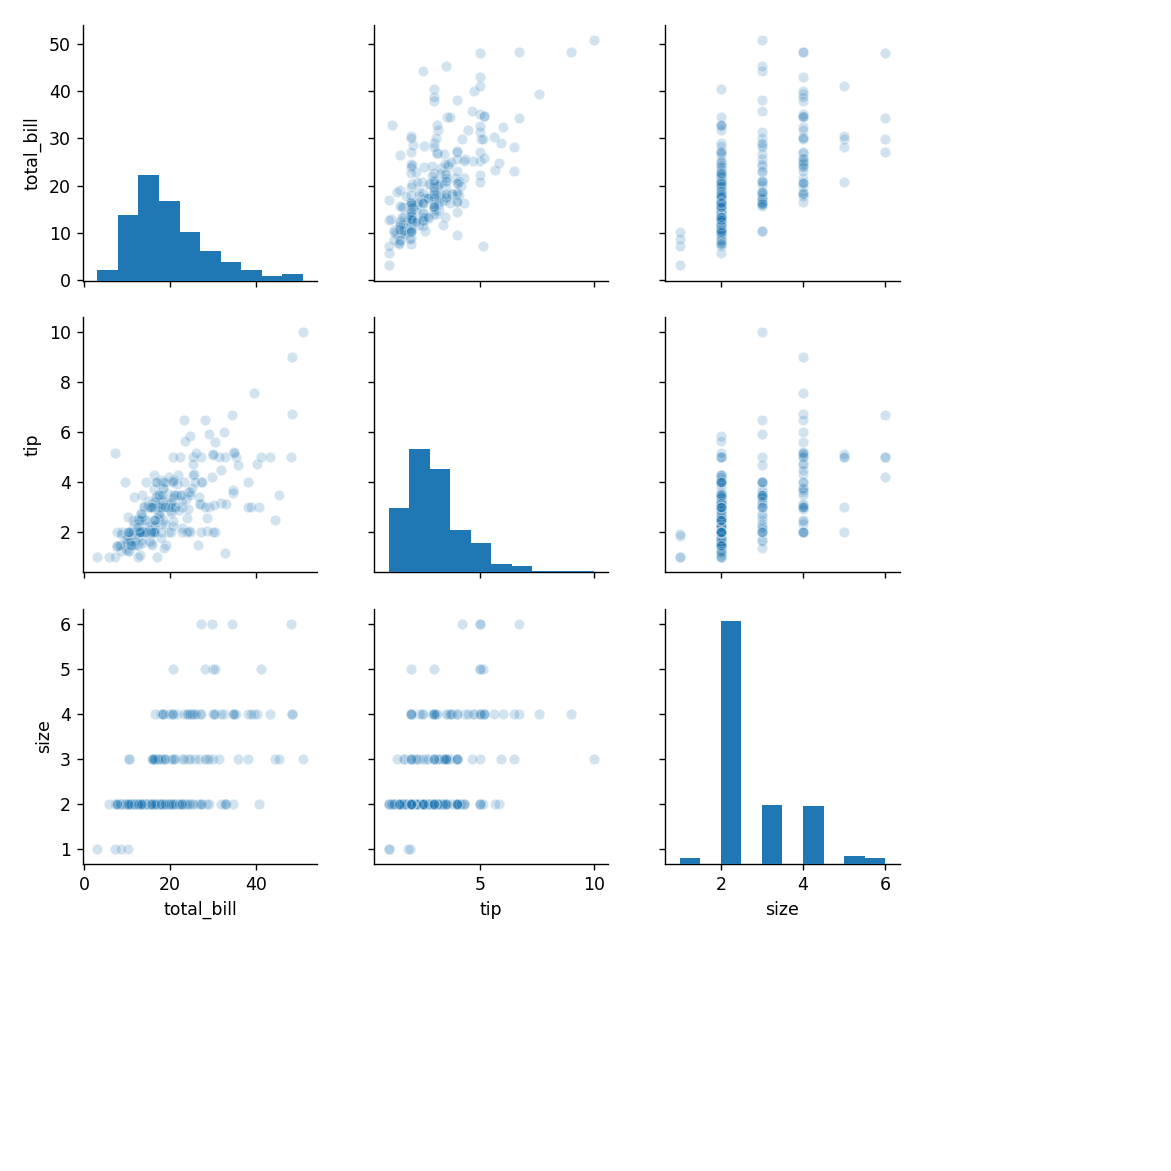

In [174]:
sns.pairplot(tip, diag_kind='hist',plot_kws={'alpha':0.2})

##### 分面网格（facet grid）和类型数据

要是数据集有额外的分组维度呢？有多个分类变量的数据可视化的一种方法是使用小面网格。seaborn有一个有用的内置函数catplot，可以简化制作多种分面图（主要是针对有多个分类变量）

In [175]:
sns.set(style='darkgrid')

In [177]:
tip.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


<IPython.core.display.Javascript object>


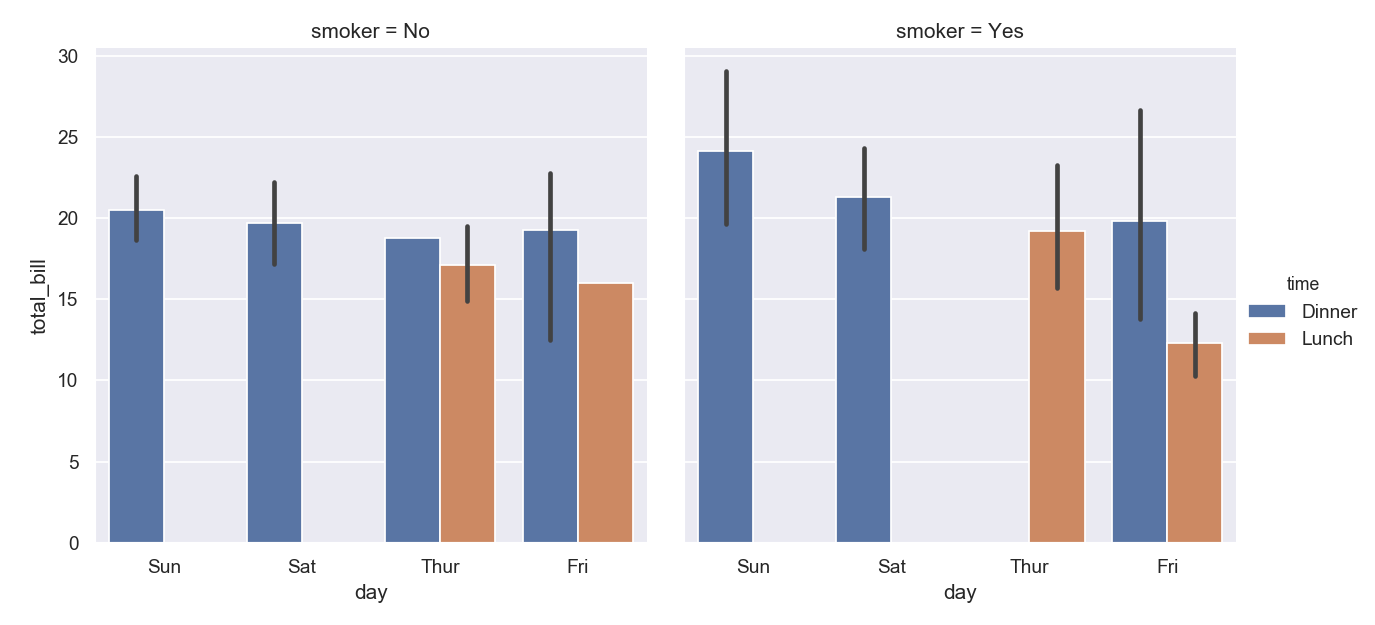

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [183]:
sns.catplot(data=tip, x='day', y='total_bill', col='smoker',hue='time', kind='bar')

<IPython.core.display.Javascript object>


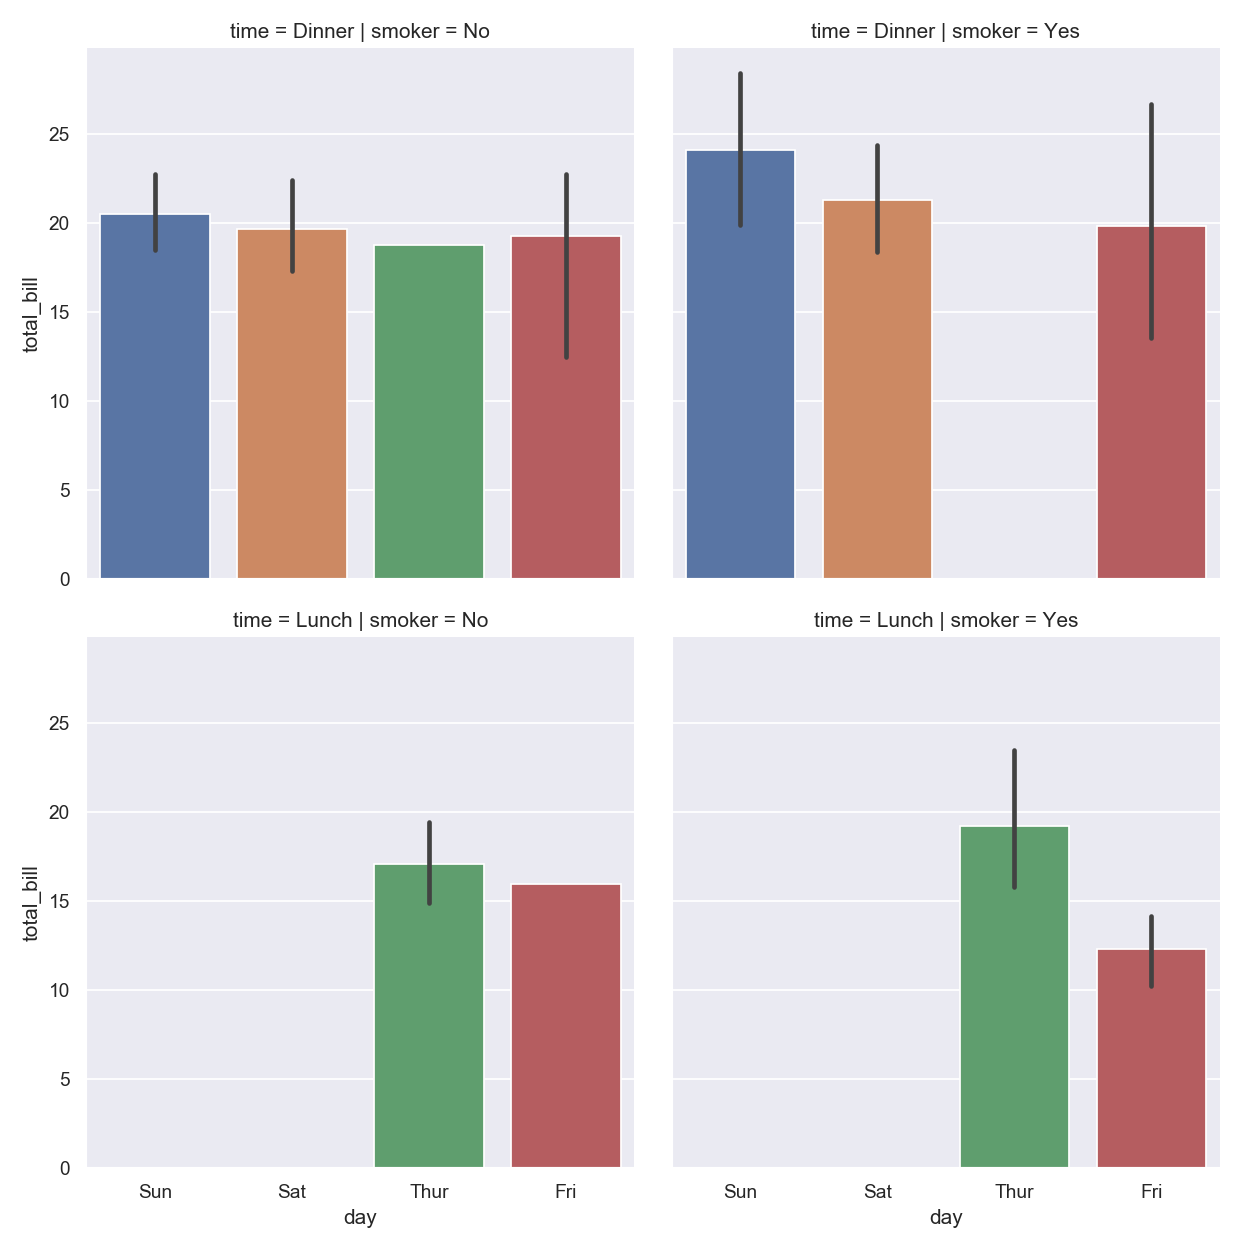

In [184]:
sns.catplot(data=tip, x='day', y='total_bill', kind='bar', col='smoker', row='time')

以上是对catplot方法进行简单介绍，具体功能参见[官方文档](https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot)

使用更通用的seaborn.FacetGrid类，你可以创建自己的分面网格。请查阅seaborn的[文档](https://seaborn.pydata.org/)。